# **Simulacion**
## Facilitador: José Gabriel Rodríguez Rivas
## Alumna: Lluvia A. Saenz S.
---

**Distribución LogNormal**
En una tienda departamental de electrónica, los tiempos de
espera de los clientes para recibir atención en el mostrador de servicio
técnico tienen una distribución lognormal. Se sabe que el tiempo
promedio de espera es de 10 minutos y una desviación estándar de 2
minutos, lo que genera una cola considerable en ciertos momentos del
día.

* **Objetivo:** Generar tiempos de espera para 50 clientes en el mostrador de
servicio y analizar la duración de la fila de espera.
---


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [4]:
media_espera = 10  # Media de los tiempos de espera en minutos
desviacion_espera = 2  # Desviación estándar de los tiempos de espera en minutos

# Convertir media y desviación estándar a mu y sigma de la variable logarítmica
mu = np.log(media_espera**2 / np.sqrt(desviacion_espera**2 + media_espera**2))
sigma = np.sqrt(np.log(1 + (desviacion_espera**2 / media_espera**2)))

num_clientes = 50 # Número de clientes

U = np.random.uniform(0, 1, num_clientes) # Generar variables aleatorias Uniforme(0, 1)

Z = mu + sigma * stats.norm.ppf(U) # Aplicar la transformada inversa para obtener tiempos de espera lognormales
T = np.exp(Z)  # Tiempos de espera generados

Tiempos de espera generados: [14.86007739 10.67153887 11.36128057  8.52816328  7.88361852  8.29316359
  8.05174164 12.9948468   8.4895771   9.65447396  8.7721976   8.61089306
  6.59653886 11.13625144  9.62910607 10.65701554 10.78199231 10.15139586
  8.34601053 12.32223428  7.4867748   7.80601561 11.15758267  9.91141123
  8.82005054  5.09303965 13.04793231  7.83043759  8.82650775  7.85560286
  8.77520768 13.58649558 10.49338575 14.06922577  8.93748497  7.38422615
  8.82998832  7.73129692  9.62207831 11.10560853 14.02528036 11.86638045
 13.62902603  8.65584408 11.14974689  7.71566195  8.57426262 10.09984418
  9.31661355  8.82380418]


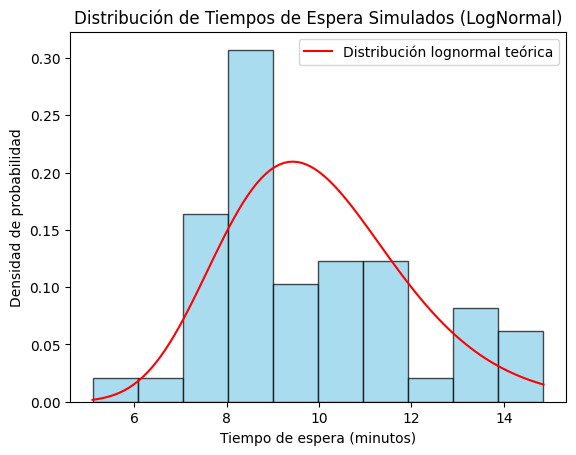

In [5]:
print("Tiempos de espera generados:", T)
plt.hist(T, bins=10, edgecolor='black', density=True, alpha=0.7, color='skyblue')

#función teórica de densidad de la distribución lognormal
x = np.linspace(min(T), max(T), 100)
pdf = stats.lognorm.pdf(x, sigma, scale=np.exp(mu))
plt.plot(x, pdf, 'r', label='Distribución lognormal teórica')

plt.title("Distribución de Tiempos de Espera Simulados (LogNormal)")
plt.xlabel("Tiempo de espera (minutos)")
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.show()

**Tiempo de espera:** Representa los tiempos de espera de los clientes en minutos.

**Densidad de probabilidad:** Muestra la frecuencia relativa de los tiempos de espera simulados.

**Curva de densidad teórica lognormal:** La línea roja representa la *densidad de probabilidad teórica*.

# **CONCLUSION**

Como la mayoría de los tiempos están cerca de la media de 10 minutos, pero con una “cola” que se extiende hacia valores mayores, la distribución lognormal permite modelar con precisión estos datos.
Ayuda a preveer que, en la mayoría de los casos, los tiempos de espera estarán en torno a los 10 minutos, aunque es importante prepararse para los picos ocasionales, que podrían prolongar los tiempos de espera.